In [1]:
library(Seurat)
library(monocle)
library(RColorBrewer)
library(pheatmap)
source("pseudotime_heatmap.R")

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject

Loading required package: Matrix

Warning message:
“package ‘Matrix’ was built under R version 4.2.3”
Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, g

In [2]:
CD45pPBMC.NK <- readRDS("/home/suyanchi/project/dab/results/case/rds/CD45pPBMC.integrated.nk.rds")

In [13]:
CD45pPBMC.NK <- readRDS("/home/suyanchi/project/dab/results/case/rds/PBMC.NK.rds")

In [3]:
dat <- as(as.matrix(CD45pPBMC.NK@assays$RNA@counts), "sparseMatrix")
pd <- new('AnnotatedDataFrame', data = CD45pPBMC.NK@meta.data)
fData <- data.frame(gene_short_name = rownames(dat), row.names = rownames(dat))
fd <- new('AnnotatedDataFrame', data = fData)
mycds <- newCellDataSet(dat, phenoData = pd, featureData = fd, expressionFamily = negbinomial.size())
mycds <- estimateSizeFactors(mycds)
mycds <- estimateDispersions(mycds,relative_expr = T)
# 使用monocle选择的高变基因
disp.tbl <- dispersionTable(mycds)
disp.genes <- subset(disp.tbl, mean_expression >= 0.1 & dispersion_empirical >= 1 * dispersion_fit)$gene_id
mycds <- setOrderingFilter(mycds, disp.genes)

Warning message:
“`group_by_()` was deprecated in dplyr 0.7.0.
ℹ Please use `group_by()` instead.
ℹ See vignette('programming') for more help
ℹ The deprecated feature was likely used in the monocle package.
  Please report the issue to the authors.”
Warning message:
“`select_()` was deprecated in dplyr 0.7.0.
ℹ Please use `select()` instead.
ℹ The deprecated feature was likely used in the monocle package.
  Please report the issue to the authors.”
Removing 253 outliers



Warning message:
“Transformation introduced infinite values in continuous y-axis”


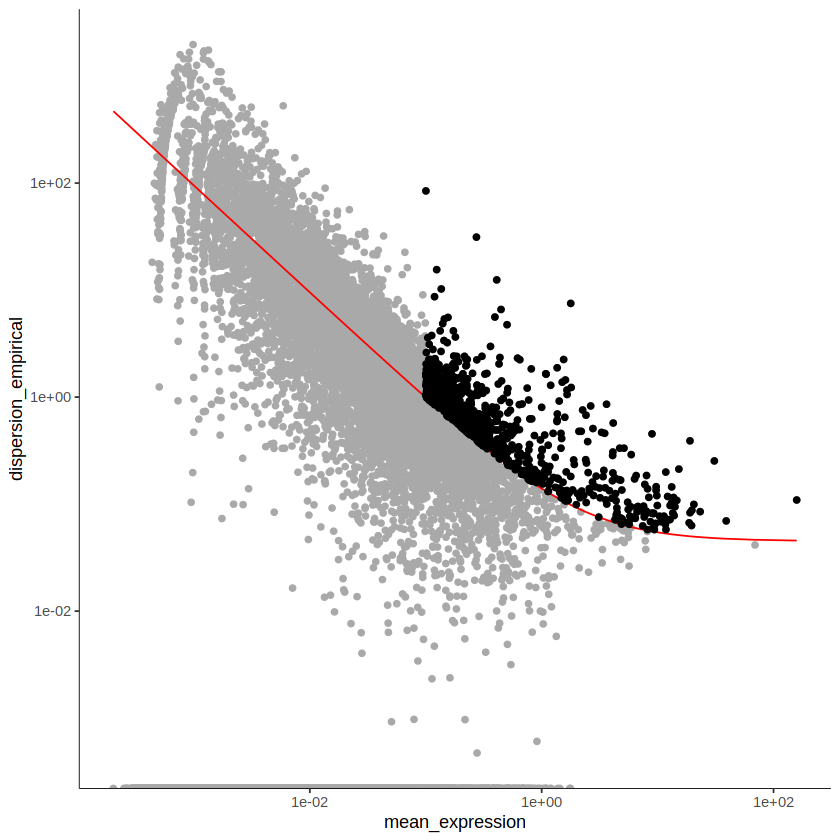

In [4]:
p1 <- plot_ordering_genes(mycds)
p1

In [5]:
mycds <- reduceDimension(mycds, max_components = 2, method = "DDRTree")
mycds <- orderCells(mycds)
#saveRDS(mycds, file = "/home/suyanchi/project/dab/results/case/rds/CD45pPBMC.monocle.cds.rds")

Warning message in graph.dfs(dp_mst, root = root_cell, neimode = "all", unreachable = FALSE, :
“Argument `neimode' is deprecated; use `mode' instead”


ERROR: Error in if (class(projection) != "matrix") projection <- as.matrix(projection): the condition has length > 1


In [7]:
p1 <- plot_cell_trajectory(mycds, color_by = "classI") + 
  scale_color_manual(values = c("#4E9BD3","#DB4840","#DF78C1")) +
  theme(panel.border = element_rect(size = 1.5, colour = "grey45", fill = NA),
        axis.text = element_blank(), axis.title = element_blank(),
        axis.ticks = element_blank(), axis.line = element_blank())
p1

Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
ERROR while rich displaying an object: Error in `geom_point()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 2nd layer.
Caused by error in `FUN()`:
! object 'classI' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rp

In [ ]:
ggsave("/home/suyanchi/project/dab/results/case/figures/CD45pPBMC.NK.trajectory.pdf",p1,width = 6,height = 4)

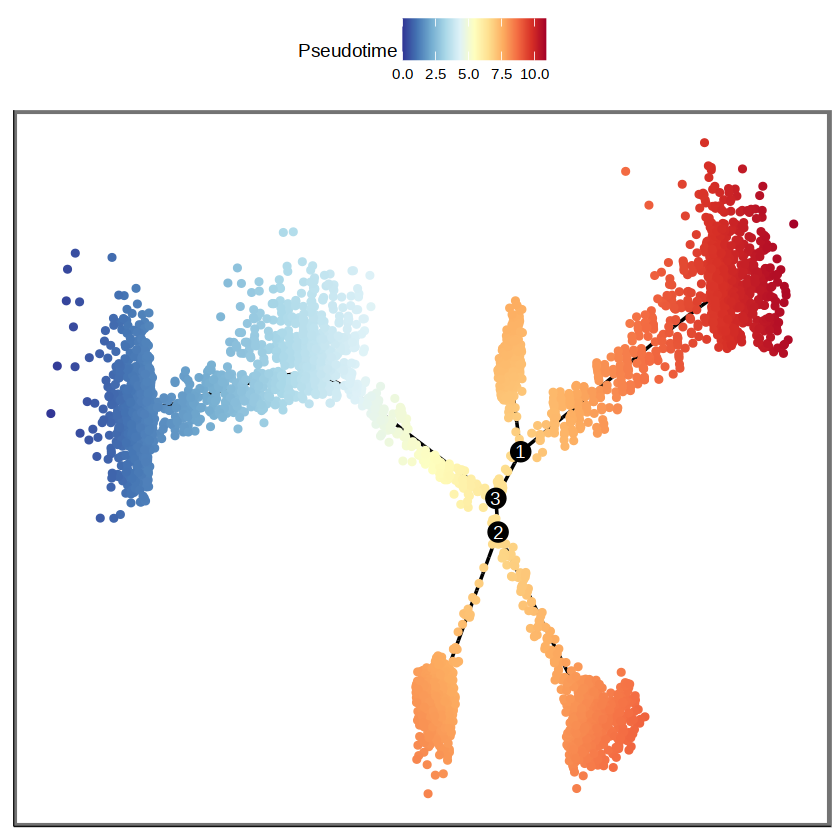

In [7]:
p2 <- plot_cell_trajectory(mycds, color_by = "Pseudotime") +
  scale_color_gradientn(colours = rev(colorRampPalette(RColorBrewer::brewer.pal(11,"RdYlBu"))(256))) +
  theme(panel.border = element_rect(size = 1.5, colour = "grey45", fill = NA),
        axis.text = element_blank(), axis.title = element_blank(),
        axis.ticks = element_blank(), axis.line = element_blank())
p2

In [ ]:
ggsave("/home/suyanchi/project/dab/results/case/figures/CD45pPBMC.NK.pseudo.pdf",p2,width = 6,height = 4)

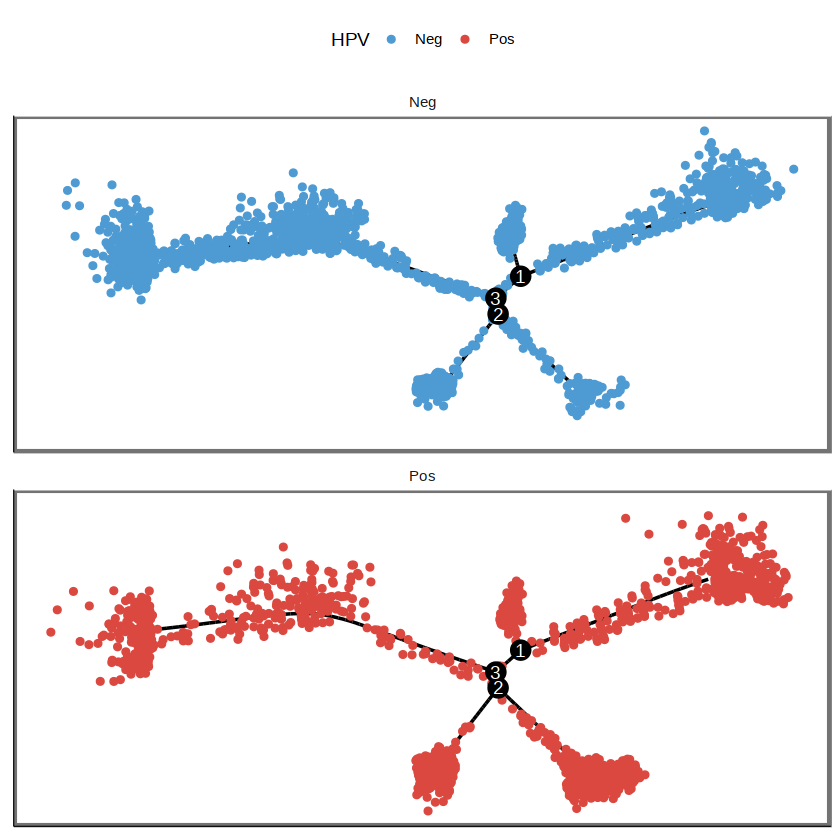

In [8]:
p3 <- plot_cell_trajectory(mycds, color_by = "HPV") + facet_wrap(~HPV, nrow = 2) +
  scale_color_manual(values = c("#4E9BD3","#DB4840")) +
  theme(panel.border = element_rect(size = 1.5, colour = "grey45", fill = NA),
        axis.text = element_blank(), axis.title = element_blank(),
        axis.ticks = element_blank(), axis.line = element_blank())
p3

In [ ]:
ggsave("/home/suyanchi/project/dab/results/case/figures/CD45pPBMC.NK.splitByHPV.pdf",p3,width = 6,height = 8)

In [9]:
mature <- c("CD160","FCGR3A","GZMB","CCL3")
cols <- c("grey88","red")

In [10]:
for(i in 1:length(mature)){
  p <- FeaturePlot(CD45pPBMC.NK, features = mature[i], reduction = "tsne", cols = cols) +
    theme(panel.border = element_rect(size = 1.5, colour = "grey45", fill = NA),
          axis.text = element_blank(), axis.title = element_blank(),
          axis.ticks = element_blank(), axis.line = element_blank())
  ggsave(paste0("/home/suyanchi/project/dab/results/case/figures/CD45pPBMC.",mature[i],".pdf"),p,width = 5,height = 5)
}

In [11]:

# cluster-based differential genes
disp.tbl <- dispersionTable(mycds)
disp.genes <- subset(disp.tbl, mean_expression >= 0.5 & dispersion_empirical >= 1 & dispersion_fit)
disp.genes <- as.character(disp.genes$gene_id)
diff.test <- differentialGeneTest(mycds[disp.genes,], cores = 1)
# diff.test <- differentialGeneTest(mycds[gene,], cores = 1, fullModelFormulaStr = "~sm.ns(Pseudotime)")
sig.genename <- rownames(subset(diff.test, qval < 0.01))


$heatmap_matrix
                  1          2          3          4          5          6
CD52     -0.3686487 -0.4083989 -0.4478921 -0.4870395 -0.5257534 -0.5639481
JUN      -0.8655697 -0.7960094 -0.7251741 -0.6532028 -0.5802462 -0.5064677
CD2      -0.4785425 -0.5046395 -0.5304115 -0.5558046 -0.5807677 -0.6052514
C1orf56   0.3700288  0.4179740  0.4659731  0.5138897  0.5615850  0.6089186
CDC42SE1  0.8910445  0.9109007  0.9307011  0.9503553  0.9697728  0.9888622
DUSP2    -1.5802452 -1.5306798 -1.4798151 -1.4277068 -1.3744186 -1.3200227
AREG     -2.0118540 -1.9388305 -1.8638959 -1.7871251 -1.7086048 -1.6284337
DUSP1    -1.8746712 -1.8035122 -1.7305043 -1.6557383 -1.5793179 -1.5013591
HNRNPH1   1.8407372  1.8050567  1.7694486  1.7338848  1.6983379  1.6627804
PTGDS     1.3158535  1.2794584  1.2432501  1.2072731  1.1715709  1.1361865
KLRC1    -0.1553582 -0.2077837 -0.2591590 -0.3093972 -0.3584190 -0.4061526
NFKBIA   -1.1584540 -1.0985856 -1.0383081 -0.9777325 -0.9169735 -0.8561493
FOS      

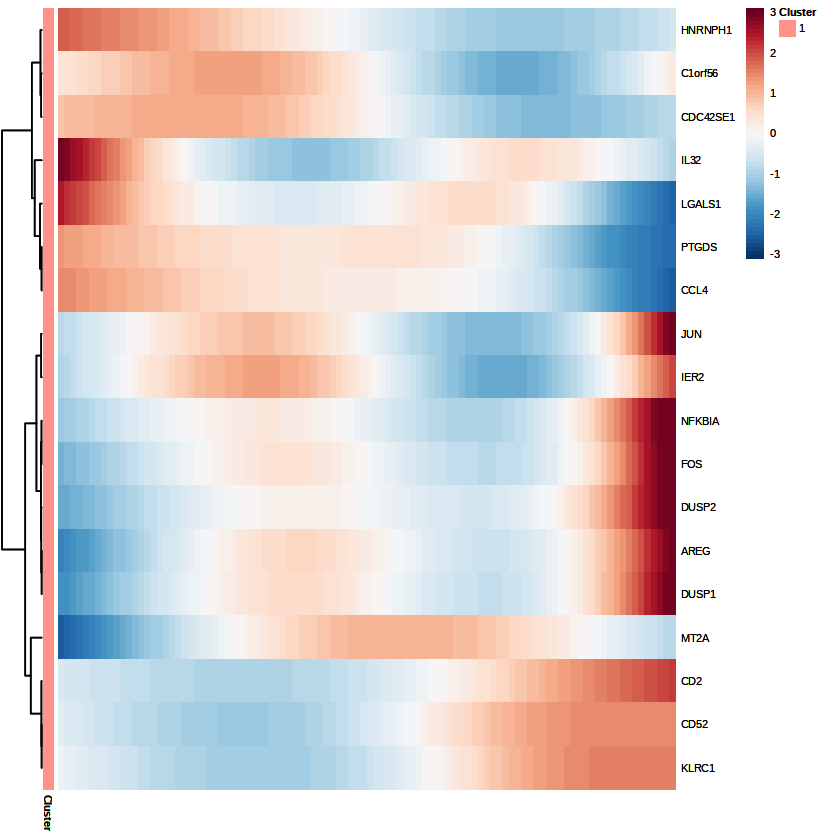

In [13]:
p1 <- pseudotime_heatmap(mycds[sig.genename,],show_rownames = T,return_heatmap = T,num_clusters = 1)
p1

In [14]:
save_pheatmap_pdf <- function(x, filename, width, height) {
  stopifnot(!missing(x))
  stopifnot(!missing(filename))
  pdf(filename, width=width, height=height)
  grid::grid.newpage()
  grid::grid.draw(x$gtable)
  dev.off()
}
save_pheatmap_pdf(p1$ph_res, filename = "/home/suyanchi/project/dab/results/case/figures/CD45pPBMC.NK.pseudo.heatmap2.pdf",width = 5,height = 6)

png 
  2